/tmp/ipykernel_1980253/3028865567.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=["xbins", "rho_X", "rho_C"])


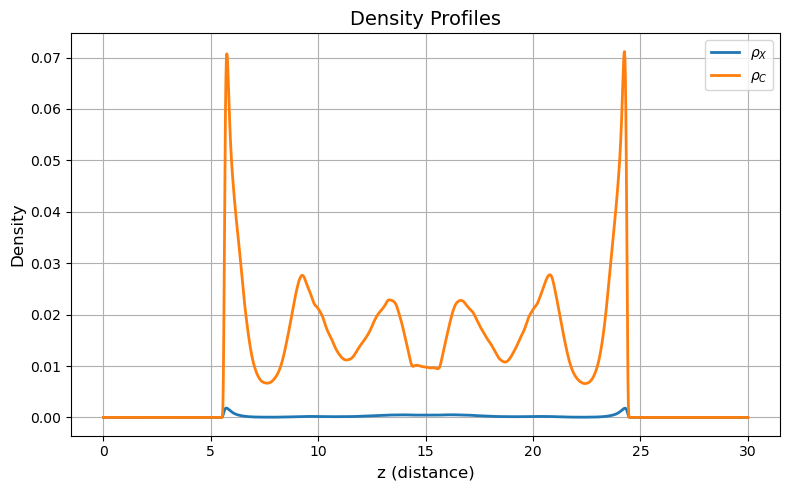

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Path to your file
filename = "slit_data/123.out"

# Step 1: Find the line where data starts (after the header)
with open(filename) as f:
    lines = f.readlines()

# Find the index of the line that contains the column headers
for i, line in enumerate(lines):
    if line.strip().startswith("xbins"):
        data_start = i + 1
        break

# Step 2: Load the data using pandas
from io import StringIO
data_str = ''.join(lines[data_start:])
data = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=["xbins", "rho_X", "rho_C"])

# Step 3: Plot the profiles
plt.figure(figsize=(8, 5))
plt.plot(data["xbins"], data["rho_X"], label=r'$\rho_X$', lw=2)
plt.plot(data["xbins"], data["rho_C"], label=r'$\rho_C$', lw=2)
plt.xlabel("z (distance)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Density Profiles", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1980253/2071569821.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=["xbins", "rho_X", "rho_C"])


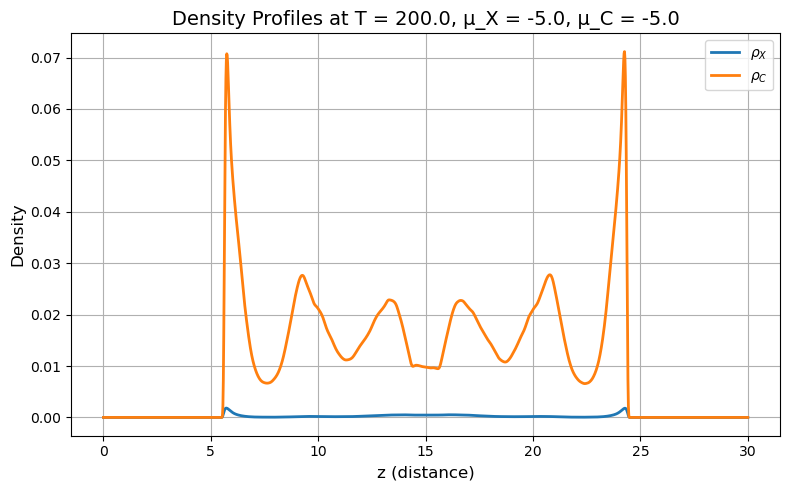

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

filename = "slit_data/123.out"

# Read the file
with open(filename) as f:
    lines = f.readlines()

# Extract parameters from header
params = {}
for line in lines:
    if line.strip().startswith("xbins"):
        break
    parts = line.strip().split()
    if len(parts) >= 2:
        key = parts[0]
        value = parts[1]
        params[key] = value

# Retrieve needed values
T = float(params.get("temperature", 0))
muX = float(params.get("muX", 0))
muC = float(params.get("muC", 0))

# Find the start of data
for i, line in enumerate(lines):
    if line.strip().startswith("xbins"):
        data_start = i + 1
        break

# Load data with specified column names
data_str = ''.join(lines[data_start:])
data = pd.read_csv(StringIO(data_str), delim_whitespace=True, names=["xbins", "rho_X", "rho_C"])

# Plot the profiles
plt.figure(figsize=(8, 5))
plt.plot(data["xbins"], data["rho_X"], label=r'$\rho_X$', lw=2)
plt.plot(data["xbins"], data["rho_C"], label=r'$\rho_C$', lw=2)
plt.xlabel("z (distance)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title(f"Density Profiles at T = {T}, μ_X = {muX}, μ_C = {muC}", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()